In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd

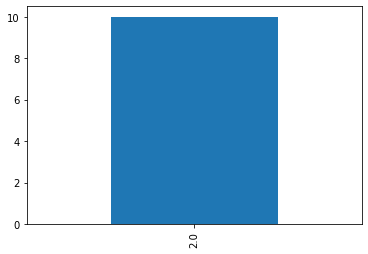

In [36]:
#fnames=glob.glod('/*')
fnames=['D:/test.jpg']*10
df=pd.DataFrame({},columns=['ratio1','ratio2','mean_ratio'])
for ind,fname in enumerate(fnames):
    im = cv.imread(fname)
    imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    areas=[cv.contourArea(cnt) for cnt in contours]
    max_cnt=np.argmax(areas)
    cnt=contours[max_cnt]
    cv.drawContours(im, [cnt], -1, (0,255,0), 3)
    #plt.imshow(im)
    x,y,w,h = cv.boundingRect(cnt)
    cv.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
    ratio1=cv.contourArea(cnt)/np.prod(im.shape[:2])
    ratio2=(w*h)/np.prod(im.shape[:2])
    
    bbox_mean=im[x:x+w,y:y+h].mean()
    border_mean=abs(im.mean()-bbox_mean)
    mean_ratio=bbox_mean/border_mean
    mean_img=im[x:x+w,y:y+h].mean
    
    df.loc[ind]=[ratio1,ratio2,mean_ratio]
    #plt.imshow(im)
_bins=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
df.ratio2,bins=pd.cut(df.ratio2,bins=5,labels=range(5),retbins=True)
df.ratio2=df.ratio2.astype(float)
df.ratio2.value_counts().plot.bar()
plt.show()

In [31]:
df

,ratio1,ratio2,mean_ratio
0,0.082937,2.0,2.523699
1,0.082937,2.0,2.523699
2,0.082937,2.0,2.523699
3,0.082937,2.0,2.523699
4,0.082937,2.0,2.523699
5,0.082937,2.0,2.523699
6,0.082937,2.0,2.523699
7,0.082937,2.0,2.523699
8,0.082937,2.0,2.523699
9,0.082937,2.0,2.523699
